In [1]:
from matplotlib import pyplot as plt
from controller import *
from metric import *
from position_computation_genetic import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def plot_arm(rotations, destinations, shoulder):
    elbow = get_relative_elbow(rotations)
    wrist = get_relative_wrist(rotations)
    palm_top, palm = get_relative_palm(rotations)

    arr = np.array([shoulder, elbow, wrist+elbow, wrist+elbow+palm])

    ax = Axes3D(plt.figure(figsize=(7,7)))
    ax.set_xlim3d(-300, 350)
    ax.set_ylim3d(-300, 350)
    ax.set_zlim3d(-300, 350)

    palm_points = np.array([palm+wrist+elbow, palm_top+wrist+elbow])
    print(palm_points)

    ax.scatter(arr.T[0], arr.T[1], arr.T[2], c='r',s=100)
    ax.scatter(palm_points.T[0], palm_points.T[1], palm_points.T[2], c='b',s=60)
    ax.plot(arr.T[0], arr.T[1], arr.T[2], color='r', linewidth=6)
    ax.scatter([-50, -50], [0, 0], [100, -300], c='g',s=100)
    ax.scatter(destinations.T[0], destinations.T[1], destinations.T[2], c='y',s=200)
    ax.plot([-50, -50], [0, 0], [100, -300], color='g', linewidth=6)
    plt.show()


/tmp/ipykernel_2627/4105304235.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure(figsize=(7,7)))


[[402.73755505  15.           4.41040836]
 [397.99759076  15.          34.33736508]]


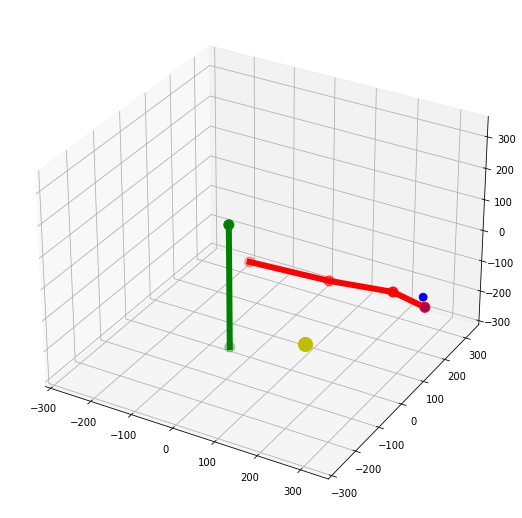

In [3]:
rotations = np.array([0, 0, 0, 0, 0])
shoulder = np.array([0, 0, 0]) # relative_shoulder_position
destination = np.array([200., -120., -100.])
plot_arm(rotations, np.array([destination]), shoulder)

[[ 299.96081755  199.99933658 -100.03097081]
 [ 301.30015067  203.61004919  -69.9767042 ]]


/tmp/ipykernel_2627/4105304235.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure(figsize=(7,7)))


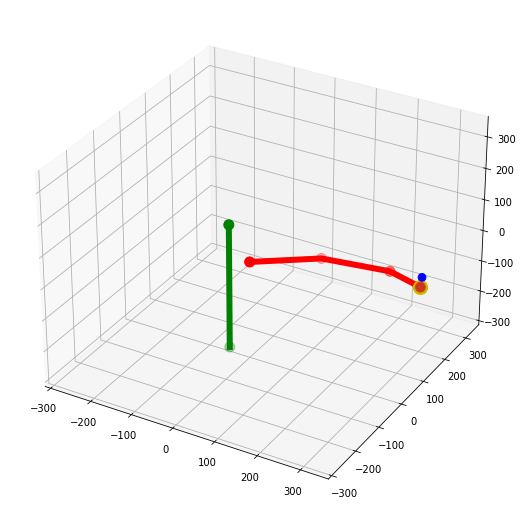

Rotations: [-31.13037793  50.23756274 -31.95033669 -36.51987829   7.06306829]
Accuracy: 0.29568232099725617mm


In [4]:
destination = np.array([300, 200, -100])

correction = rotations_to_position(shoulder, destination, rotations, 1000, 30, 5)

plot_arm(correction[1], np.array([destination]), shoulder)
print(f'Rotations: {correction[1]}')
print(f'Accuracy: {correction[0]}mm')

In [5]:
head_rotation = -7
hip_rotation = 25
table_height = 743
object_height = 40
body_rotations = [hip_rotation, head_rotation]
current_rotations = [0, 0, 0, 0, 0]

In [6]:
relative_shoulder_position = json.loads(call_python_version("2.7", "positions", "set_body", [body_rotations, ROBOT_IP]))

In [7]:
#call_python_version("2.7", "positions", "prepare_for_movement", [ROBOT_IP])

In [21]:
relative_shoulder_position = json.loads(call_python_version("2.7", "positions", "set_arm", [[115, 0, 0, 0, 0], ROBOT_IP]))

In [9]:
camera_position = json.loads(call_python_version("2.7", "positions", "get_camera_position", [ROBOT_IP]))

In [10]:
camera_position

[432.33227729797363, -118.31236630678177, 1014.323353767395]

In [11]:
shoulder_position = json.loads(call_python_version("2.7", "positions", "get_shoulder_position", [ROBOT_IP]))

In [12]:
shoulder_position

[331.65445923805237, 71.31092250347137, 907.6732993125916]

[  76.68581796  130.78125    -231.32335377]
[ 242.89222908  -78.28125    -231.32335377]
[-166.20641112  209.0625        0.        ]
267.0799505846363
[ 166.20641112 -209.0625        0.        ]
267.0799505846363


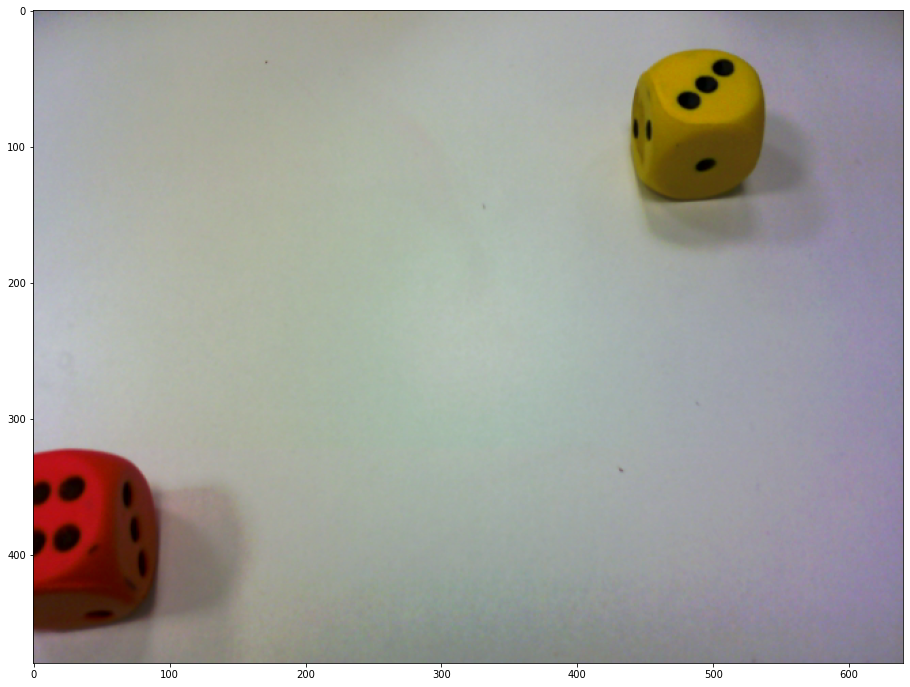

In [17]:
z = camera_position[2] - (table_height + object_height)
plt.figure(figsize = (16, 12))
plt.imshow(cv2.cvtColor(get_image(), cv2.COLOR_HSV2RGB))
object_positions = get_objects(head_rotation + hip_rotation, z)

In [14]:
"""
measures 32.34544825365471, should be about 100mm
measures 53.15418365339467, should be about 155mm
measures 74.43588932894612, should be about 200mm
measures 89.23237865213761, should be about 250mm

53/32 = 1.64
74/53 = 1.39
89/74 = 1.20

155/100 = 1.55
200/155 = 1.29
250/200 = 1.25



"""

print((100/32.34544825365471+155/53.15418365339467+200/74.43588932894612+250/89.23237865213761)/4)



2.8740549534263833


In [15]:
object_positions

array([[ 186.02485826,  -89.0625    , -231.48321342],
       [ 198.30784857,   39.375     , -231.48321342]])

In [16]:
current_rotations = get_rotations_to_position(object_positions[0], relative_shoulder_position, current_rotations, hip_rotation)

accuracy: 110.03566997385745


In [ ]:
json.loads(call_python_version("2.7", "positions", "set_arm", [[int(x) for x in current_rotations], ROBOT_IP]))

[-136.6254687309265, 165.1630997657776, -108.25759172439575]